# **PERKENALAN**

Nama : Sutisna

Grade Challenge 1 

Dataset yang digunakan berbentuk csv, dimana di data tersebut berisi 721 pokemon, dengan nomor, type 1 dan type 2, dan status dasar: seperti HP (healthy point), Sp.Atk (kekuatan serangan), Sp.Def (kekuatan bertahan) dan Speed (kecepatan serangan).
Dari dataset tersebut akan dicari, yang manakah pokemon terbaik berdasarkan status dasar, dan apakah ada pengaruh antara pokemon yang memiliki 1 type dengan pokemon yang memiliki 2 type.


# **IMPORT PUSTAKA**

In [34]:
import numpy as np
import pandas as pd

# **DATA LOADING**

In [35]:
df = pd.read_csv('Pokemon.csv')

# **INFORMASI DASAR DATA**

In [36]:
df.shape

(800, 13)

dataset pokemon mempunyai 800 baris dan 12 kolom, selanjutnya saya akan menampilkan data dari baris atas.

In [37]:
df.head() 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Saya akan menampilkan data dari bawah

In [38]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


Untuk eksplorasi data saya akan melihat 10 sampel random dari data 

In [39]:
df.sample(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
596,536,Palpitoad,Water,Ground,384,75,65,55,65,55,69,5,False
435,390,Chimchar,Fire,NaN,309,44,58,44,58,44,61,4,False
647,586,Sawsbuck,Normal,Grass,475,80,100,70,60,70,95,5,False
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True
470,423,Gastrodon,Water,Ground,475,111,83,68,92,82,39,4,False
575,516,Simipour,Water,NaN,498,75,98,63,98,63,101,5,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
726,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False
548,490,Manaphy,Water,NaN,600,100,100,100,100,100,100,4,False
416,379,Registeel,Steel,NaN,580,80,75,150,75,150,50,3,True


melihat informasi type data, jumlah baris dan data yang kosong dari setiap kolom

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Dapat terlihat dari info diatas bahwa, untuk kolom Type 2 ada banyak data yang kosong. Hal ini mungkin terjadi dikarenakan tidak semua pokemon memiliki 2 type (dual type).

Selanjutnya melihat statistik data.

In [41]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Dari statistik diatas terlihat bahwa tidak ada nilai yang tidak bisa dijelaskan, seperti nilai max nol atau nilai min 0 dsb. Dengan demikian dataset tersebut siap digunakan.

# **DATA CLEANING**

Mengganti semua kolom dengan huruf besar

In [42]:
df.columns = df.columns.str.upper()
df.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Menghilangkan 2 kolom 'GENERATION' dan '#' yang tidak diperlukan untuk analisa.

In [43]:
df.drop(["GENERATION", "#"], axis = 1, inplace = True)
df.head()

,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,LEGENDARY
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,False


Men-set kolom nama menjadi index

In [44]:
df.set_index("NAME", inplace = True)
df.head()

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,LEGENDARY
NAME,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,False


Menghilangkan prefix sebelum kata 'mega' di kolom index (Name)

In [45]:
df.index = df.index.str.replace(".*(?=Mega)", "")
df.head()

<ipython-input-45-b51cf0b3a188>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.index = df.index.str.replace(".*(?=Mega)", "")


,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,LEGENDARY
NAME,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,False


Mengganti isi 'NaN' dengan 'tidak punya type 2' di kolom TYPE 2

In [46]:
data_type2_dengan_catatan = df.copy()
data_type2_dengan_catatan["TYPE 2"].fillna(
        value = "Tidak punya type 2", inplace = True)
data_type2_dengan_catatan.head()

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,LEGENDARY
NAME,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,False
Charmander,Fire,Tidak punya type 2,309,39,52,43,60,50,65,False


# **DATA QUERY**

Kita akan melihat data pokemon legendary

In [47]:
df[df["LEGENDARY"] == True]

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,LEGENDARY
NAME,,,,,,,,,,
Articuno,Ice,Flying,580,90,85,100,95,125,85,True
Zapdos,Electric,Flying,580,90,90,85,125,90,100,True
Moltres,Fire,Flying,580,90,100,90,125,85,90,True
Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,True
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,True
...,...,...,...,...,...,...,...,...,...,...
Diancie,Rock,Fairy,600,50,100,150,100,150,50,True
Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,True
HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,True


untuk data legend pokemon ada 65 baris dan 10 kolom, berarti ada 65 legendary pokemon.

Selanjutnya kita akan melihat data pokemon legenda yang mempunyai dual type dan total basic status lebih dari 700.

In [48]:
df[
    (df["LEGENDARY"] == True) &
    (df["TYPE 2"].notnull()) &
    (df["TOTAL"] > 700)]

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,LEGENDARY
NAME,,,,,,,,,,
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,True
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,True
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,True


Berikutnya kita akan melihat data pokemon yang hanya mempunyai 1 tipe dan total basic status lebih dari 700.

In [49]:
df[
    (df["LEGENDARY"] == True) &
    (df["TYPE 2"].isnull()) &
    (df["TOTAL"] > 700)]

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,LEGENDARY
NAME,,,,,,,,,,
Mega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,True
KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,True
Arceus,Normal,NaN,720,120,120,120,120,120,120,True


Kita akan melihat data pokemon non legendary yang mempunyai 2 tipe dan total basic status kurang dari 200

In [50]:
df[
    (df["LEGENDARY"] == False) &
    (df["TYPE 2"].notnull()) &
    (df["TOTAL"] < 200)]

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,LEGENDARY
NAME,,,,,,,,,,
Weedle,Bug,Poison,195,40,35,30,20,20,50,False
Ralts,Psychic,Fairy,198,28,25,25,45,35,40,False
Azurill,Normal,Fairy,190,50,20,40,20,40,20,False


# **GROUPING AND AGGREGATING**

Kita akan melihat pokemon dengan type 1 yang juga ada type 2 dengan total basic status

In [51]:
df.groupby(["TYPE 1", "TYPE 2"])["TOTAL"].sum()

TYPE 1  TYPE 2  
Bug     Electric     791
        Fighting    1100
        Fire         910
        Flying      5873
        Ghost        236
                    ... 
Water   Ice         1535
        Poison      1280
        Psychic     2405
        Rock        1715
        Steel        530
Name: TOTAL, Length: 136, dtype: int64

Selanjutnya kita melihat gabungan 2 kolom type 2 dan legendary dengan status legendary adalah true, attack > 100 dan defense > 80

In [52]:
df[
    (df["LEGENDARY"] == True) &
    (df["ATTACK"] > 100) &
    
    (df["DEFENSE"] > 80)
].groupby(["TYPE 2", "LEGENDARY"])["TOTAL"].count()

TYPE 2    LEGENDARY
Dragon    True         3
Electric  True         1
Fairy     True         1
Fighting  True         2
Fire      True         2
Flying    True         6
Ice       True         3
Psychic   True         1
Water     True         1
Name: TOTAL, dtype: int64

Berikutnya saya akan menampilkan gabungan 2 kolom type 1 dan legendary dengan status legendary adalah false, speed < 50 dan defense > 100

In [53]:
df[
    (df["LEGENDARY"] == False) &
    (df["SPEED"] < 50) &
    (df["DEFENSE"] > 100)
].groupby(["TYPE 2", "LEGENDARY"])["TOTAL"].count()

TYPE 2   LEGENDARY
Dark     False        1
Dragon   False        1
Flying   False        1
Ghost    False        2
Ground   False        5
Ice      False        1
Psychic  False        3
Rock     False        8
Steel    False        6
Name: TOTAL, dtype: int64

# **EXPLORASI DATA**

Dari dataset pokemon tersebut kita dapat mengetahui sebagai berikut:

Pokemon yang memiliki attack tertinggi adalah:

In [54]:
df[df["ATTACK"] == df["ATTACK"].max()]

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,LEGENDARY
NAME,,,,,,,,,,
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,True


Pokemon yang memiliki defense tertinggi adalah:

In [55]:
df[df["DEFENSE"] == df["DEFENSE"].max()]

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,LEGENDARY
NAME,,,,,,,,,,
Mega Steelix,Steel,Ground,610,75,125,230,55,95,30,False
Shuckle,Bug,Rock,505,20,10,230,10,230,5,False
Mega Aggron,Steel,NaN,630,70,140,230,60,80,50,False


Pokemon yang memiliki total basic status tertinggi adalah:

In [56]:
df[df["TOTAL"] == df["TOTAL"].max()]

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,LEGENDARY
NAME,,,,,,,,,,
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,True
Mega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,True
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,True


Ada berapa macamkah type pokemon di kolom TYPE 1?

Berikut ini adalah type pokemon di TYPE 1:
  ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']

Total type pokemon:  18

Jumlah tiap typenya:
 Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: TYPE 1, dtype: int64

Dilihat dalam grafik



<AxesSubplot:>

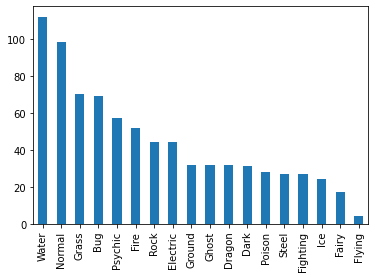

In [57]:
print("Berikut ini adalah type pokemon di TYPE 1:\n ", df["TYPE 1"].unique())
print("\nTotal type pokemon: ", df["TYPE 1"].nunique())
print("\nJumlah tiap typenya:\n", df["TYPE 1"].value_counts())
print("\nDilihat dalam grafik\n")
df["TYPE 1"].value_counts().head(18).plot(kind = "bar")

Ada berapa macamkah type pokemon di kolom TYPE 2?

Berikut ini adalah type pokemon di TYPE 2:
  ['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']

Total type pokemon:  18

Jumlah tiap typenya:
 Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Rock        14
Ghost       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: TYPE 2, dtype: int64

Dilihat dalam grafik



<AxesSubplot:>

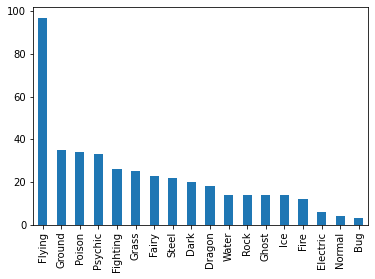

In [58]:
print("Berikut ini adalah type pokemon di TYPE 2:\n ", df["TYPE 2"].unique())
print("\nTotal type pokemon: ", df["TYPE 2"].nunique())
print("\nJumlah tiap typenya:\n", df["TYPE 2"].value_counts())
print("\nDilihat dalam grafik\n")
df["TYPE 2"].value_counts().head(18).plot(kind = "bar")

Saya akan membuat kolom baru di data dengan isinya adalah pokemon dengan type1 & type 2

In [59]:
df["TYPE 1_2"] = df["TYPE 1"] + "&" + df["TYPE 2"]
df.head()

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,LEGENDARY,TYPE 1_2
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False,Grass&Poison
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False,Grass&Poison
Venusaur,Grass,Poison,525,80,82,83,100,100,80,False,Grass&Poison
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,False,Grass&Poison
Charmander,Fire,NaN,309,39,52,43,60,50,65,False,NaN


Ada berapa macamkah pokemon yang memiliki type 1 dan type 2?


Total type 1 & 2 pokemon:  136

Jumlah tiap typenya:
 Normal&Flying     24
Grass&Poison      15
Bug&Flying        14
Bug&Poison        12
Ghost&Grass       10
                  ..
Poison&Bug         1
Psychic&Dark       1
Electric&Water     1
Ghost&Dark         1
Steel&Fighting     1
Name: TYPE 1_2, Length: 136, dtype: int64

Dilihat dalam grafik



<AxesSubplot:>

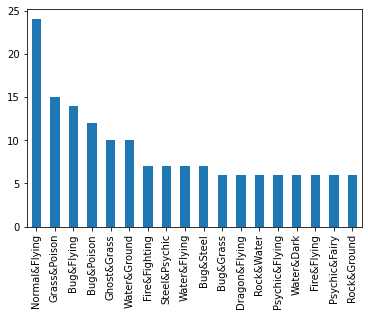

In [60]:
print("\nTotal type 1 & 2 pokemon: ", df["TYPE 1_2"].nunique())
print("\nJumlah tiap typenya:\n", df["TYPE 1_2"].value_counts())
print("\nDilihat dalam grafik\n")
df["TYPE 1_2"].value_counts().head(18).plot(kind = "bar")

Dari Type manakah Pokemon Legend Terkuat yang berasal dari type 1?

In [61]:
legend_pokemon = df[
                    (df["LEGENDARY"] == True) &
                    (df["TOTAL"] > 700)]

<AxesSubplot:>

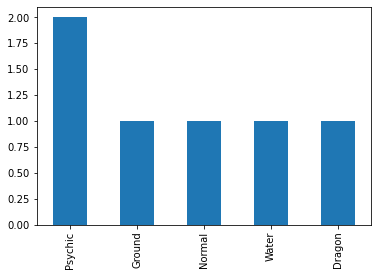

In [62]:
legend_pokemon["TYPE 1"].value_counts().head(5).plot(kind = "bar")

Dari type manakah Pokemon Non Legend terkuat yang berasal dari Type 2

<AxesSubplot:>

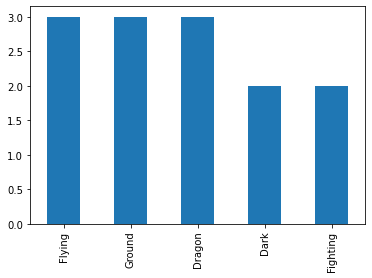

In [63]:
nonlegend_pokemon = df[
                    (df["LEGENDARY"] == False) &
                    (df["TOTAL"] > 600)]
nonlegend_pokemon["TYPE 2"].value_counts().head(5).plot(kind = "bar")

# **KESIMPULAN**

Dari data diatas dapat disimpulkan bahwa pokemon dengan mega evolution adalah pokemon dengan basic status tertinggi, dengan pokemon tertingginya adalah **Mega Mewtwo X**, dimana type pokemon terkuat paling banyak dari type **Psychic**. 